### 1. Preparation

Installing required libraries

In [189]:
#%pip install matplotlib
#%pip install pandas
#%pip install seaborn
#%pip install scipy
#%pip install scikit-learn
#%pip install statsmodels

Importing Libraries

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### 2. Data Preprocessing

##### Import Dataset

In [191]:
df = pd.read_csv('customer_churn_data.csv', sep=';')
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.0,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


##### Dataset General Info

Checking data types

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   object 
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 78.3+ KB


Change TotalCharges into float64

In [193]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     829 non-null    float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


Check the number of rows and columns

In [195]:
df.shape #rows, cols

(1000, 10)

Check duplicated values

In [196]:
df.duplicated().sum()

np.int64(0)

Check null values

In [197]:
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges       171
TechSupport          0
Churn                0
dtype: int64

There are two columns that have Null values:

    a. InternetService (object) => we can impute this by creating new category
    b. TotalCharges (float64) => we can impute this by using median

#### Impute Missing Data

##### a. InternetService

Create new category called "Not Mentioned"

In [198]:
df['InternetService'] = df['InternetService'].fillna('Not Mentioned')

<Axes: xlabel='InternetService', ylabel='count'>

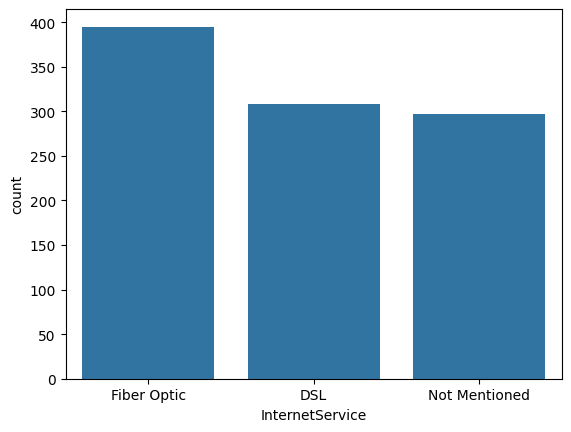

In [199]:
sns.countplot(df, x='InternetService')

**This method is actually a simplified version of SimpleImputer (without using sklearn library), for reference:**

https://www.youtube.com/watch?v=k3KrhjvaCq0

We can impute the "Not Mentioned" values using One Hot Encoder:

https://www.analyticsvidhya.com/blog/2021/04/how-to-handle-missing-values-of-categorical-variables/

or by using "simpleImputer":

https://www.analyticsvidhya.com/blog/2022/10/handling-missing-data-with-simpleimputer/

##### b. TotalCharges

<Axes: xlabel='TotalCharges', ylabel='Count'>

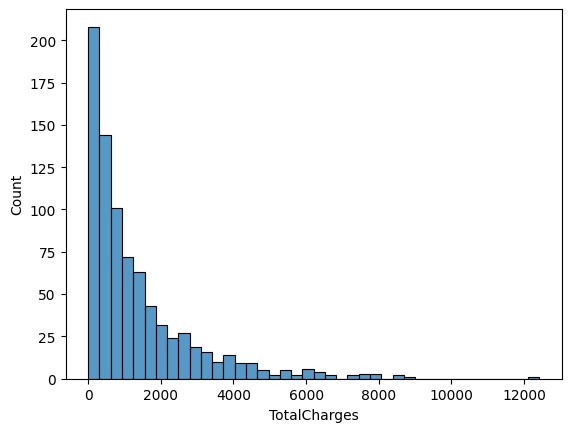

In [200]:
sns.histplot(df, x='TotalCharges')

The distribution is not normal, therefore we need to use median to impute the data

In [201]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [202]:
df['TotalCharges'].isnull().sum()

np.int64(0)

#### Labeling Churn Data

To make it easier for analysis, we can change the labeling of Churn column (which is Yes or No) into a binary value (0 and 1) using LabelEncoder from scikitlearn

In [203]:
df['Churn'].unique()

array(['Yes', 'No'], dtype=object)

In [204]:
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder() 

df['Churn'] = label_encoder.fit_transform(df['Churn'])

df['Churn'].unique()

array([1, 0])

#### Dataset Statistical Info

In [205]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges,Churn
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1256.095960,0.883000
std,288.819436,9.797741,18.89257,25.712083,1453.373048,0.321581
min,1.000000,12.000000,0.00000,30.000000,0.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,377.400000,1.000000
50%,500.500000,45.000000,13.00000,74.060000,796.320000,1.000000
75%,750.250000,51.000000,26.00000,96.102500,1509.257500,1.000000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000,1.000000


#### Outlier Detection and Normalization

In [206]:
#Outlier Detection using IQR

q1 = df['Tenure'].quantile(0.25)
q3 = df['Tenure'].quantile(0.75)

print(f'Q1 = {q1}')
print(f'Q3 = {q3}')

threshold = 1.5

IQR = q3-q1

tenure_outliers = df[(df['Tenure'] < q1 - threshold * IQR) | (df['Tenure'] > q3 + threshold * IQR)]
tenure_outliers

Q1 = 5.0
Q3 = 26.0


,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
18,19,35,Male,98,49.59,Two-Year,Fiber Optic,796.32,Yes,0
29,30,42,Male,62,97.66,Two-Year,Fiber Optic,6054.92,Yes,0
112,113,45,Female,88,51.73,Month-to-Month,Fiber Optic,4552.24,Yes,1
119,120,52,Female,66,80.96,Month-to-Month,Fiber Optic,5343.36,Yes,1
131,132,45,Female,62,86.22,Month-to-Month,DSL,5345.64,No,1
...,...,...,...,...,...,...,...,...,...,...
800,801,54,Female,75,31.23,Two-Year,DSL,2342.25,No,1
832,833,34,Female,60,56.62,Month-to-Month,DSL,3397.20,Yes,1
896,897,43,Female,61,75.00,One-Year,Not Mentioned,4575.00,No,1
941,942,53,Male,64,98.99,One-Year,Fiber Optic,6335.36,No,1


In [207]:
df['Tenure'].describe()

count    1000.00000
mean       18.97300
std        18.89257
min         0.00000
25%         5.00000
50%        13.00000
75%        26.00000
max       122.00000
Name: Tenure, dtype: float64

In [208]:
#Outlier Detection using IQR

q1 = df['TotalCharges'].quantile(0.25)
q3 = df['TotalCharges'].quantile(0.75)

print(f'Q1 = {q1}')
print(f'Q3 = {q3}')

threshold = 1.5

IQR = q3-q1

total_charges_outliers = df[(df['TotalCharges'] < q1 - threshold * IQR) | (df['TotalCharges'] > q3 + threshold * IQR)]
total_charges_outliers

Q1 = 377.4
Q3 = 1509.2575


,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
24,25,39,Male,47,79.36,One-Year,DSL,3729.92,Yes,0
28,29,38,Female,34,100.38,Two-Year,DSL,3412.92,Yes,1
29,30,42,Male,62,97.66,Two-Year,Fiber Optic,6054.92,Yes,0
30,31,38,Male,34,102.27,Month-to-Month,DSL,3477.18,No,1
98,99,45,Male,44,111.09,Two-Year,Not Mentioned,4887.96,No,1
...,...,...,...,...,...,...,...,...,...,...
910,911,41,Male,39,82.70,Two-Year,DSL,3225.30,Yes,0
929,930,44,Male,44,95.72,Month-to-Month,Fiber Optic,4211.68,No,1
941,942,53,Male,64,98.99,One-Year,Fiber Optic,6335.36,No,1
952,953,32,Female,40,82.61,Month-to-Month,Not Mentioned,3304.40,No,1


In [209]:
df['TotalCharges'].describe()

count     1000.000000
mean      1256.095960
std       1453.373048
min          0.000000
25%        377.400000
50%        796.320000
75%       1509.257500
max      12416.250000
Name: TotalCharges, dtype: float64

C:\Users\RizkyBagaskara\AppData\Local\Temp\ipykernel_5360\3147014193.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Tenure'], shade=True, color='blue')


<Axes: xlabel='Tenure', ylabel='Density'>

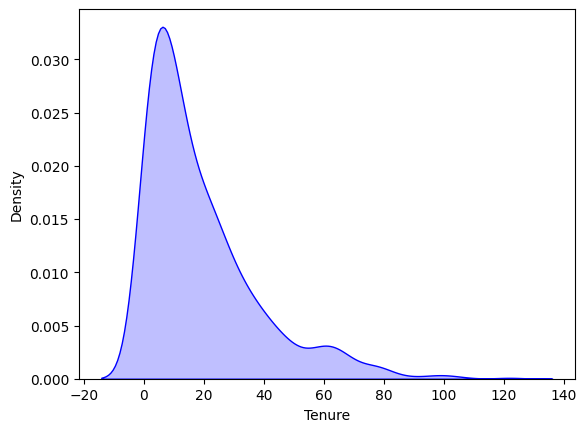

In [210]:
sns.kdeplot(df['Tenure'], shade=True, color='blue')

C:\Users\RizkyBagaskara\AppData\Local\Temp\ipykernel_5360\1154907917.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['TotalCharges'], shade=True, color='blue')


<Axes: xlabel='TotalCharges', ylabel='Density'>

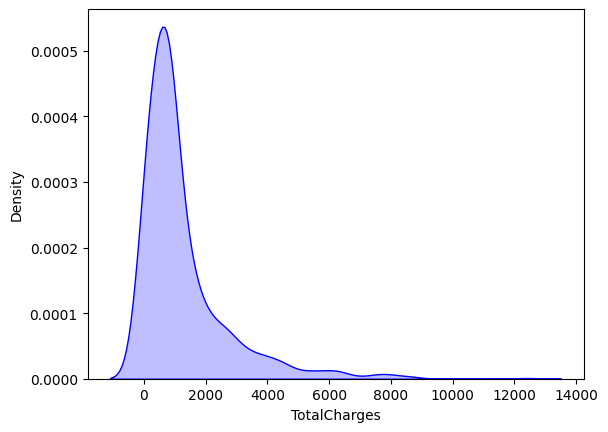

In [211]:
sns.kdeplot(df['TotalCharges'], shade=True, color='blue')

Better to use no transformation because it gets the highest score or considered to drop the outliers all together

**Dropped the ouliters**

In [212]:
df = df.drop(tenure_outliers.index)

In [213]:
# df = df.drop(total_charges_outliers.index)

**Impute the value using median**

In [214]:
# #tenure
# median_tenure = df['Tenure'].median()

# #impute the data
# df.loc[tenure_outliers.index, 'Tenure'] = median_tenure

In [215]:
# # total charges
# total_charges_median = df['TotalCharges'].median()

# #impute the data
# df.loc[tenure_outliers.index, 'TotalCharges'] = total_charges_median

After the imputation:

In [216]:
# sns.kdeplot(df['Tenure'])

In [217]:
# sns.kdeplot(df['TotalCharges'])

https://medium.com/womenintechnology/log-transformation-to-mitigate-the-effect-of-outliers-413cdd275495#:~:text=Log%20transformations%20are%20a%20powerful,the%20performance%20of%20statistical%20models

In [218]:
#square root transformation

# df['TotalCharges'] = np.sqrt(df['TotalCharges'])
# print("Dataset with Square Root Transformation TotalCharges:")
# df.head()

In [219]:
#use log transform

# df['Tenure'] = np.log(df['Tenure'])
# print("Dataset with Square Root Transformation TotalCharges:")
# df.head()

In [220]:
#cube root transformation

# df['Tenure'] = np.cbrt(df['Tenure'])
# print("Dataset with Cube Root Transformation Tenure:")
# df.head()

In [221]:
# sns.kdeplot(df['Tenure'])

In [222]:
# count_all_inf = ((df['TotalCharges'] == np.inf) | (df['TotalCharges'] == -np.inf)).sum()
# print(count_all_inf)

Drop the infinite value

In [223]:
df['Tenure'].replace(-np.inf, np.nan, inplace=True)

df.dropna(subset=['Tenure'], inplace=True)

C:\Users\RizkyBagaskara\AppData\Local\Temp\ipykernel_5360\3706417178.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Tenure'].replace(-np.inf, np.nan, inplace=True)


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 939 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       939 non-null    int64  
 1   Age              939 non-null    int64  
 2   Gender           939 non-null    object 
 3   Tenure           939 non-null    int64  
 4   MonthlyCharges   939 non-null    float64
 5   ContractType     939 non-null    object 
 6   InternetService  939 non-null    object 
 7   TotalCharges     939 non-null    float64
 8   TechSupport      939 non-null    object 
 9   Churn            939 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 80.7+ KB


kalau linear regression data yang di modelkan tidak diasumsikan berdistribusi normal, std errornya baru diasumsikan berdistribusi normal


lakukan transformation dari data tsb jika:
- lebih mudah diinterpretasi koefisiennya
- dapat menghasilkan hubungan lebih linier

jika hasilnya sama, berarti gausah, make aja yang awal/weight

salah satu alternatif untuk mengatasi variance adallah weighted

kalau negatif hasil coef modelnya bisa make rata2 dari kolom (kalau datanya kontinu) untuk dijadikan prediktor

dia gabisa ngubah nilai model score, tp bisa ngubah cara interpretasinya lebih mudah

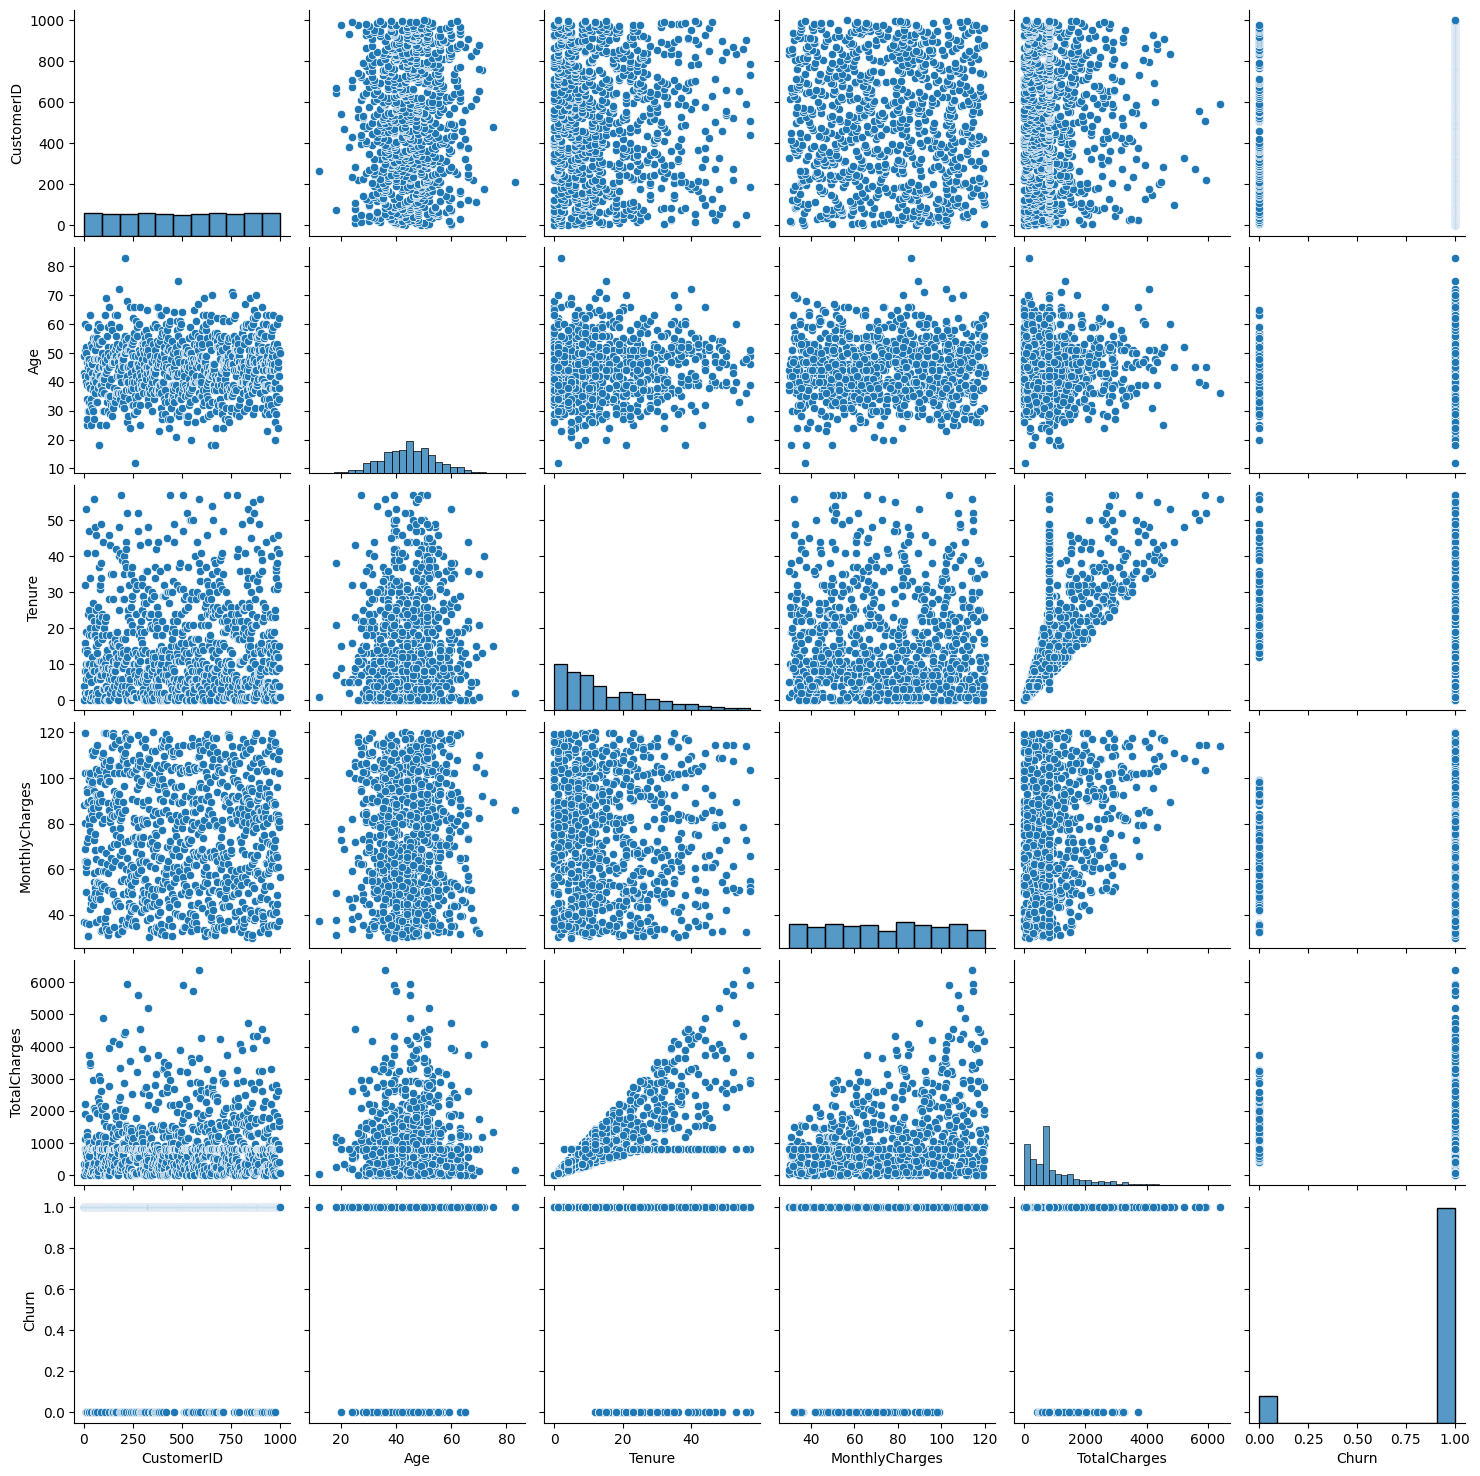

In [225]:
sns.pairplot(df)

Let's take a look at the correlation by using Heatmap:

In [226]:
numeric_columns = df.select_dtypes(np.number)
corr = numeric_columns.corr()
corr

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges,Churn
CustomerID,1.000000,0.037726,0.012987,-0.032943,0.012950,0.022658
Age,0.037726,1.000000,0.018939,0.012098,0.029872,0.046062
Tenure,0.012987,0.018939,1.000000,-0.031735,0.766726,-0.257425
MonthlyCharges,-0.032943,0.012098,-0.031735,1.000000,0.307129,0.151876
TotalCharges,0.012950,0.029872,0.766726,0.307129,1.000000,-0.090698
Churn,0.022658,0.046062,-0.257425,0.151876,-0.090698,1.000000


<Axes: >

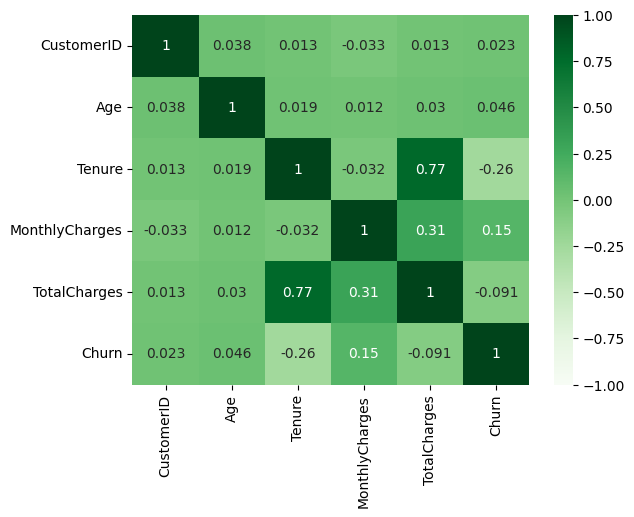

In [227]:
sns.heatmap(corr, annot=True, cmap="Greens", vmin=-1, vmax=1)

### 2. Statistical Test

#### 2a. Business Question

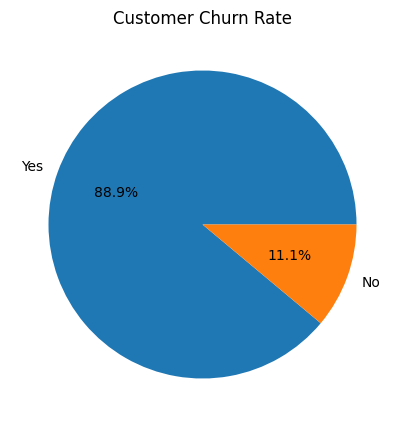

In [228]:
plt.figure(figsize=(10,5))

churn_counts = df['Churn'].value_counts()

labels = ['Yes', 'No']
sizes = [churn_counts[1], churn_counts[0]] 

plt.pie(sizes,labels=labels, autopct='%1.1f%%')
plt.title('Customer Churn Rate')
plt.show()

In [229]:
df['Age'].mean()

np.float64(44.726304579339725)

Based on the pie chart above, we can infer that the churn rate for this telecom company is 88.3%, which is way higher than the industry standard (31%). The average age of the consumer base is 44, which is middle aged. A sales manager assumes that the customer that older people tend to use internet less, therefore most of them churned.

#### 2b. Define Hypothesis

Based on the statement above, we can make a hypothesis that states:

**- H0: There is no significant difference in churn rate between younger and older consumers.**

**- H1: Older consumers have a significantly higher churn rate than younger consumers.**

Based on this hypotheses above, we will use two-tailed test (because the H1 != θ0)

#### 2c. Hypothesis Testing using T-Test

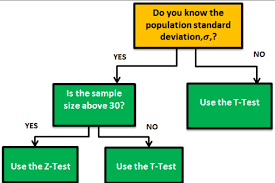

Why T-Test?
- Unknown standard deviation from population (not mentioned)

<Axes: xlabel='Age', ylabel='Density'>

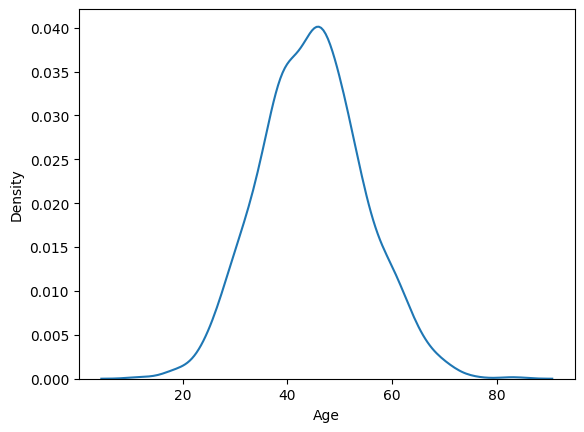

In [230]:
sns.kdeplot(df['Age'])

In [231]:
df['Age'].describe()

count    939.000000
mean      44.726305
std        9.842938
min       12.000000
25%       38.000000
50%       45.000000
75%       51.000000
max       83.000000
Name: Age, dtype: float64

##### 2.c.1. Calculate T-Statistics

Next is we want to compute t-statistics, with the formula being:

$$ t = \frac{\bar{x}-\mu_0}{\sqrt{s^2/n}}$$

- t-value tells us about how far the deviation sample mean $\bar{x}$ and population mean $\mu$ under assumption $H_0$ is true.
- We will use the ttest_1samp() function to calculate t-statistics and p-value for one-sample mean test

In [232]:
#create statistical test for T-Value
from scipy.stats import ttest_1samp

t_statistics, p_value = ttest_1samp(a = df['Age'], popmean=44, alternative='two-sided') #h1 != theta 0
print(f"t statistics: {t_statistics:.4f}")
print(f"p-value: {p_value:.4f}")

t statistics: 2.2611
p-value: 0.0240


##### 2.c.2. Defined Significance Level

Next is to find critical value based on alpha (significance level), which is 5% and because there is two regions (left and right), we divided the alpha into two:

In [273]:
from scipy.stats import t
t_crit = t.ppf(1-0.025, df = 888-1) #the dataset have 1000 rows
print(f'The critical value will be : ±{t_crit:.2f}')

The critical value will be : ±1.96


The critical region will be in:

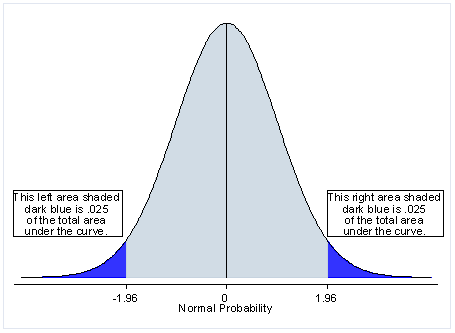

##### 2.c.3. Reject/Accept H0 based on Decision Rules

After that, we can create decision rules to either reject H0 or accept H0 based on t-statistic and p-value results

In [275]:
alpha = 0.05

if p_value<alpha:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")

Reject the null hypothesis


In [276]:
if t_statistics>t_crit or t_statistics <-t_crit:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")

Reject the null hypothesis


Visualize the critical region

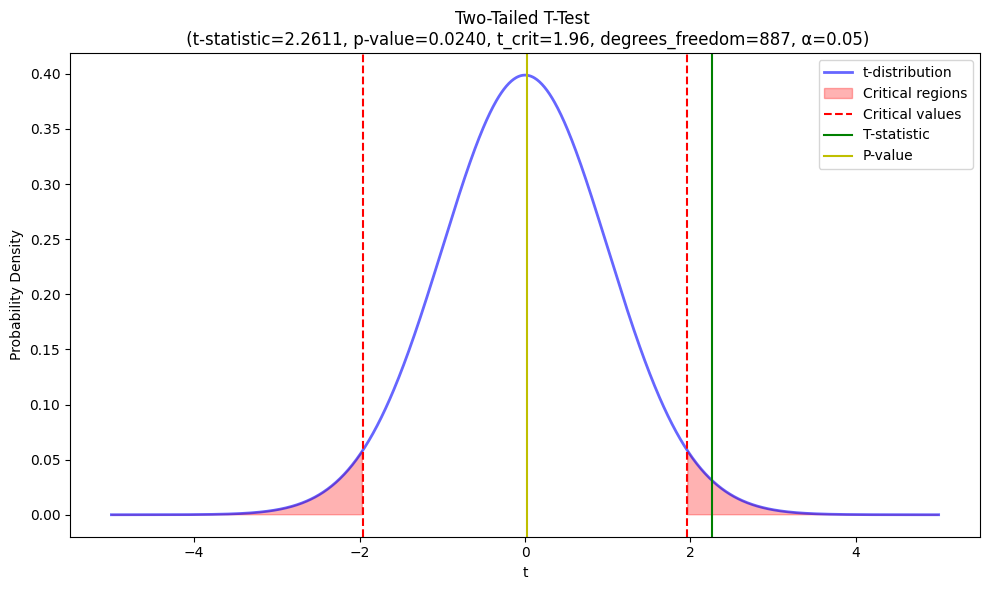

In [274]:
# #degrees of freedom
degree_freedom = 888-1

# Create the plot
plt.figure(figsize=(10, 6))

# Generate x values for the t-distribution
x = np.linspace(-5, 5, 1000)

# Plot the t-distribution
plt.plot(x, t.pdf(x, degree_freedom), 'b-', lw=2, alpha=0.6, label='t-distribution')

# Fill the critical regions
plt.fill_between(x, 0, t.pdf(x, degree_freedom), where=(x <= -t_crit) | (x >= t_crit), color='red', alpha=0.3, label='Critical regions')

# Add vertical lines for critical values and t-statistic
plt.axvline(-t_crit, color='r', linestyle='--', label='Critical values')
plt.axvline(t_crit, color='r', linestyle='--')
plt.axvline(t_statistics, color='g', linestyle='-', label='T-statistic')
plt.axvline(p_value, color='y', linestyle='-', label='P-value')

# Labeling
plt.title(f"Two-Tailed T-Test \n (t-statistic={t_statistics:.4f}, p-value={p_value:.4f}, t_crit={t_crit:.2f}, degrees_freedom={degree_freedom}, α={alpha})")
plt.xlabel('t')
plt.ylabel('Probability Density')

# Add text annotations
# plt.text(0, 0.2, f't-statistic: {t_statistics:.4f}\np-value: {p_value:.4f}', ha='center', va='center', 
#          bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# Legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

#### 2d. Decision Results

**There is enough evidence to say that the customer who churned is on the older side**.

Manager should reconsider a new strategy to retain the consumer base for the older people.

### 3. Regression Model

#### 3a. Single Predictor (Linear Regression) using Weighted Regression (WLS)

$$TotalCharges = β0 + β1Tenure$$

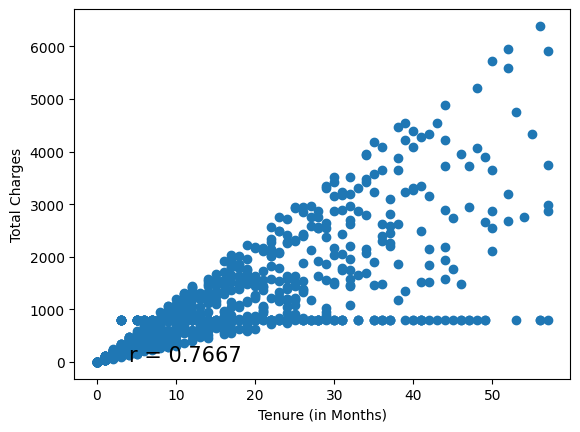

In [237]:
r = scipy.stats.pearsonr(x=df['TotalCharges'], y=df['Tenure'])[0]

# # sns.regplot(x='TotalCharges', y='Tenure', data=df)

plt.scatter(x=df['Tenure'], y=df['TotalCharges'])

plt.xlabel('Tenure (in Months)')
plt.ylabel('Total Charges')

plt.text(4,10, 'r = ' + str(round(r, 4)), fontsize=15)

plt.show()

Based on the scatter plot above, the data have heteroscedasticity. One of the appropriate method to handle that is to use WLS (Weighted Linear Regression) by giving weights to the high variances data.

Giving weights

In [238]:
#set weight for weighted regression
weights = 1/(df['Tenure']**2)

In [239]:
df['weights'] = weights
df

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn,weights
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,1,0.062500
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,1,inf
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,1,0.250000
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,1,0.015625
4,5,42,Male,32,69.01,Month-to-Month,Not Mentioned,2208.32,No,1,0.000977
...,...,...,...,...,...,...,...,...,...,...,...
994,995,34,Female,1,78.63,Month-to-Month,DSL,78.63,No,1,1.000000
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,1,0.000595
996,997,62,Male,9,80.93,Month-to-Month,Not Mentioned,796.32,No,1,0.012346
997,998,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,1,0.004444


In [240]:
count_all_inf = ((df['weights'] == np.inf) | (df['weights'] == -np.inf)).sum()
print(count_all_inf)

51


Remove infinite values

In [241]:
df['weights'].replace(np.inf, np.nan, inplace=True)

df.dropna(subset=['weights'], inplace=True)

C:\Users\RizkyBagaskara\AppData\Local\Temp\ipykernel_5360\633619165.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['weights'].replace(np.inf, np.nan, inplace=True)


In [242]:
df

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn,weights
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,1,0.062500
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,1,0.250000
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,1,0.015625
4,5,42,Male,32,69.01,Month-to-Month,Not Mentioned,2208.32,No,1,0.000977
5,6,42,Female,16,119.75,Two-Year,DSL,1916.00,Yes,1,0.003906
...,...,...,...,...,...,...,...,...,...,...,...
994,995,34,Female,1,78.63,Month-to-Month,DSL,78.63,No,1,1.000000
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,1,0.000595
996,997,62,Male,9,80.93,Month-to-Month,Not Mentioned,796.32,No,1,0.012346
997,998,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,1,0.004444


In [243]:
df[['TotalCharges', 'Tenure']].var()
df[['TotalCharges', 'Tenure']].isnull().sum()

TotalCharges    0
Tenure          0
dtype: int64

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 888 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       888 non-null    int64  
 1   Age              888 non-null    int64  
 2   Gender           888 non-null    object 
 3   Tenure           888 non-null    int64  
 4   MonthlyCharges   888 non-null    float64
 5   ContractType     888 non-null    object 
 6   InternetService  888 non-null    object 
 7   TotalCharges     888 non-null    float64
 8   TechSupport      888 non-null    object 
 9   Churn            888 non-null    int64  
 10  weights          888 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 83.2+ KB


In [245]:
df['weights'].isnull().sum()

np.int64(0)

Using statmodels to create WLS model

In [246]:
import statsmodels.formula.api as smf

valid_weights = df['weights'].notnull()

wls_model = smf.wls('TotalCharges ~ Tenure', data=df, weights=valid_weights)

wls_results = wls_model.fit()

print(wls_results.summary())

                            WLS Regression Results                            
Dep. Variable:           TotalCharges   R-squared:                       0.563
Model:                            WLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     1140.
Date:                Fri, 11 Oct 2024   Prob (F-statistic):          2.70e-161
Time:                        20:23:13   Log-Likelihood:                -7031.9
No. Observations:                 888   AIC:                         1.407e+04
Df Residuals:                     886   BIC:                         1.408e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    154.3436     35.636      4.331      0.0

##### 3.a.1. Plotting the model

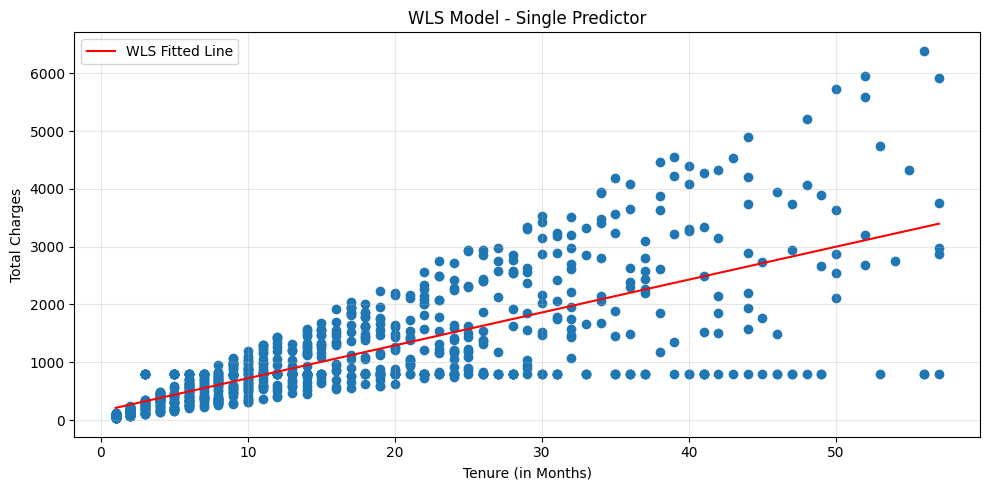

In [272]:
plt.figure(figsize=(10, 5))
plt.scatter(x=df['Tenure'], y=df['TotalCharges'])

# Generate points for the WLS regression line
tenure_range = np.linspace(df['Tenure'].min(), df['Tenure'].max(), 100)
charges_pred = wls_results.predict(exog=dict(Tenure=tenure_range))

# Plot the WLS regression line
plt.plot(tenure_range, charges_pred, color='red', label='WLS Fitted Line')

plt.xlabel('Tenure (in Months)')
plt.ylabel('Total Charges')
plt.title('WLS Model - Single Predictor')
plt.legend()

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Using OLS:

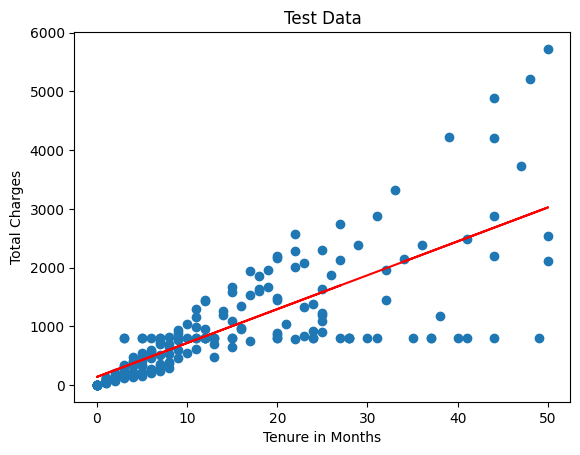

##### 3.a.2. Coefficient Interpretation (WLS)

The coefficient will be:
$$TotalCharges = 154.34 + 56.89Tenure$$

- By default, the customer who have 0 tenure will have an average of $154.34 for their Total Charge
- For each additional month of Tenure, the average Total Charge will rise to $56.89

#### 3a. Single Predictor (Linear Regression) using OLS

**Find the association between TotalCharges and Tenure**

$$y = β0 + β1X$$

Tenure as the output and TotalCharges as the Input

$$TotalCharges = β0 + β1Tenure$$

##### 3.a.1. Plot the Values

In [247]:
# r = scipy.stats.pearsonr(x=df['TotalCharges'], y=df['Tenure'])[0]

# # sns.regplot(x='TotalCharges', y='Tenure', data=df)

# plt.scatter(x=df['Tenure'], y=df['TotalCharges'])

# plt.xlabel('Tenure (in Months)')
# plt.ylabel('Total Charges')

# plt.text(4,10, 'r = ' + str(round(r, 4)), fontsize=15)

# plt.show()

1. Cari tau kenapa ada total charges yang dikit tapi tenurenya tinggi
2. Cari tau kenapa ada gap (variance) di datanya (putih kosong gtu di bawah)

Dua hal itu yang menyebabkan model scorenya rendah

In [248]:
df['ContractType'].unique()

array(['Month-to-Month', 'One-Year', 'Two-Year'], dtype=object)

In [249]:
# df[['InternetService', 'ContractType', 'TotalCharges']]

# filtered_df = df[ (df['TotalCharges'] >= 20) & (df['TotalCharges'] <= 30) ]
# filtered_df.groupby(['InternetService', 'ContractType'])['TotalCharges'].count()

##### 3.a.2. Split the Values into Train and Test

In [250]:
# from sklearn.model_selection import train_test_split

# X = df['Tenure']
# y = df['TotalCharges']

# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42) #split the data into 80/20 (80 for train, 20 for test)

Check the training values

In [251]:
# X_train

In [252]:
# y_train

##### 3.a.3. Reshape the Data

In [253]:
# X_train = np.array(X_train).reshape(-1, 1)
# X_train

In [254]:
# X_test = np.array(X_test).reshape(-1, 1)
# X_test

##### 3.a.4. Import Regression Model from scikit

In [255]:
# from sklearn.linear_model import LinearRegression

# lr = LinearRegression()

##### 3.a.5. Fit Training Values Into The Model

In [256]:
# lr.fit(X_train, y_train)

In [257]:
# intercept = lr.intercept_ #slope
# coefficient = lr.coef_ #beta-1

# print(f'Intercept: {intercept} \nCoefficient: {coefficient}')

In [258]:
# print(lr.score(X_test, y_test))

Model score:
- No transformation: 56%
- Log Transform: 48%
- Square Root: 42%
- Cube Root: 42%

##### 3.a.6. Coefficient Interpretation

$$TotalCharges =  136 + 58Tenure$$

For every increase in tenure (say 1 month), the average total charges will increase by $58

##### 3.a.7. Predict The Values

In [259]:
# #using training values
# y_predict_train1 = lr.predict(X_train)
# y_predict_train1.flatten()

In [260]:
#using testing values
# y_predict_test1 = lr.predict(X_test)
# y_predict_test1.flatten()

##### 3.a.8. Fit A Line Into The Plot

X_test and y_test

In [261]:
# plt.scatter(x=X_test, y=y_test)
# plt.plot(X_test, y_predict_test1, color='red')

# plt.xlabel('Tenure in Months')
# plt.ylabel('Total Charges')
# plt.title('Test Data')

# plt.show()

Evaluate Model Test

In [262]:
# from sklearn.metrics import mean_absolute_error,mean_squared_error 
  
# mae = mean_absolute_error(y_true=y_test,y_pred=y_predict_test1) 
# #squared True returns MSE value, False returns RMSE value. 
# mse = mean_squared_error(y_true=y_test,y_pred=y_predict_test1) #default=True 
# rmse = mean_squared_error(y_true=y_test,y_pred=y_predict_test1,squared=False) 
  
# print("MAE:",mae) 
# print("MSE:",mse) 
# print("RMSE:",rmse)

#### 3b. Multiple Predictor (Logistic Regression) => Binary Data

### 4. Conclusion and Recommendation